In [1]:
import sys
sys.version

'2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:09:15) \n[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]'

In [2]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import trange, tqdm
import pickle
import seaborn as sns
%matplotlib inline

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5, 5)

%load_ext autoreload
%autoreload 2

/home/kinshiryuu-burp/anaconda3/envs/nitinol/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Data

## Load data

In [3]:
from hackathon.utils.utils import *
from hackathon.utils.draw_utils import *
import pandas as pd

In [4]:
test_data = parse_data("../data/test_data.csv")
train_data = parse_data("../data/train_data.csv")


In [5]:
train_data.shape, test_data.shape

((55375, 81), (4344, 81))

In [6]:
train_data[:3]

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,D3POCM,D2PLND,D5PPHB,D7PLTS,D8PLTP,SPOT,D9PSPO,usbx,usby,usbz
ut_ms,,,,,,,,,,,,,,,,,,,,,
2008-08-22 00:00:00,0.133582,0.001552,0.175436,0.657240,0.000747,0.000661,0.000585,0.001927,0.244648,0.005277,...,0,0,0,0,0,0,0,0.966206,-0.145126,-0.213039
2008-08-22 01:00:00,0.217001,0.001498,0.175888,0.854918,0.000717,0.000628,0.000551,0.001834,0.230870,0.005010,...,0,0,0,0,0,0,0,-0.557435,0.791627,-0.250185
2008-08-22 02:00:00,0.155922,0.001503,0.175389,1.079016,0.000719,0.000636,0.000568,0.001856,0.202746,0.005135,...,0,0,0,0,0,0,0,0.236644,0.943469,-0.232088


In [7]:
for i, c in enumerate(train_data.columns):
    print(i, c)

0 NPWD2372
1 NPWD2401
2 NPWD2402
3 NPWD2451
4 NPWD2471
5 NPWD2472
6 NPWD2481
7 NPWD2482
8 NPWD2491
9 NPWD2501
10 NPWD2531
11 NPWD2532
12 NPWD2551
13 NPWD2552
14 NPWD2561
15 NPWD2562
16 NPWD2691
17 NPWD2692
18 NPWD2721
19 NPWD2722
20 NPWD2742
21 NPWD2771
22 NPWD2791
23 NPWD2792
24 NPWD2801
25 NPWD2802
26 NPWD2821
27 NPWD2851
28 NPWD2852
29 NPWD2871
30 NPWD2872
31 NPWD2881
32 NPWD2882
33 sunmars_km
34 earthmars_km
35 sunmarsearthangle_deg
36 solarconstantmars
37 eclipseduration_min
38 occultationduration_min
39 sa
40 sx
41 sy
42 sz
43 dmop_count_24h_AAAA
44 dmop_count_24h_AACF
45 dmop_count_24h_ADMC
46 dmop_count_24h_AHHH
47 dmop_count_24h_AMMM
48 dmop_count_24h_AOOO
49 dmop_count_24h_APSF
50 dmop_count_24h_APWF
51 dmop_count_24h_ASEQ
52 dmop_count_24h_ASSS
53 dmop_count_24h_ASXX
54 dmop_count_24h_ATMB
55 dmop_count_24h_ATTT
56 dmop_count_24h_AVVV
57 dmop_count_24h_AXXX
58 dmop_count_24h_sum
59 flagcomms
60 EARTH
61 SLEW
62 NADIR
63 MAINTENANCE
64 INERTIAL
65 ACROSS_TRACK
66 WARMUP
67 D1

## Split dataset into train/valid datasets

Here one should take special care about how to split train dataset. It is better to consider multifold cross validation scheme.

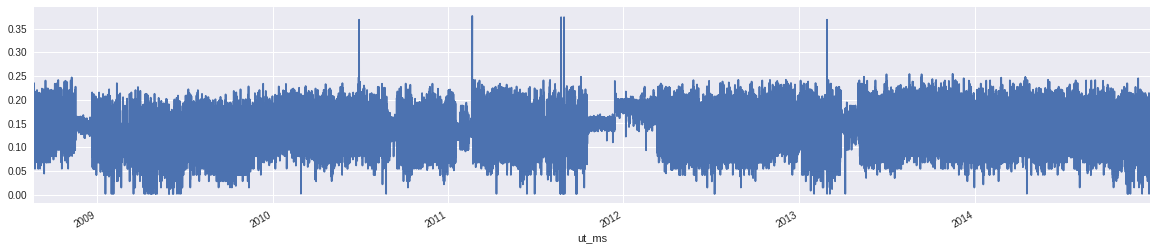

In [8]:
train_data.NPWD2372.plot(figsize=(20, 4))

In [9]:
train_dates = train_data.index < '2013-01-01 00:00:00'

In [10]:
train_df = train_data[train_dates]
valid_df = train_data[~train_dates]

train_df.shape, valid_df.shape

((37928, 81), (17447, 81))

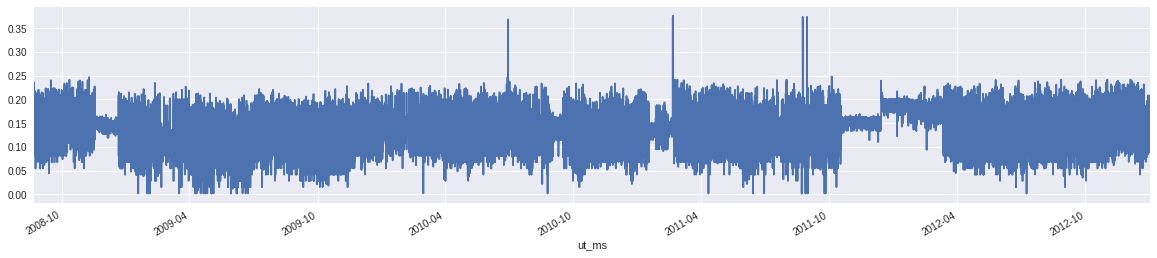

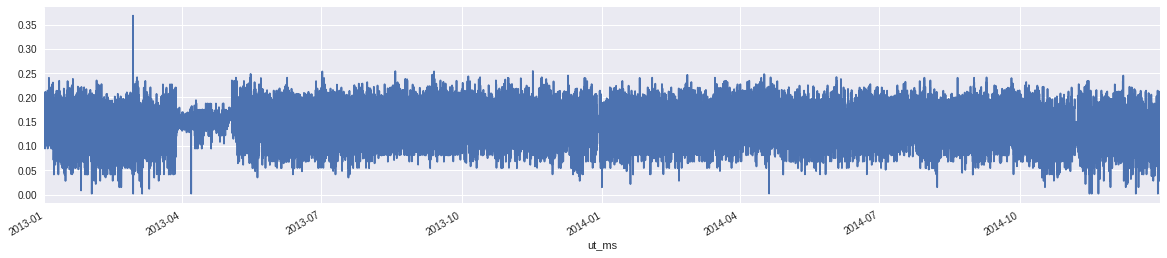

In [11]:
train_df.NPWD2372.plot(figsize=(20, 4))
plt.show()
valid_df.NPWD2372.plot(figsize=(20, 4))

In [12]:
x_columns = filter(lambda x: "NPWD" not in x 
                   and 'ut_ms' not in x, train_df.columns)
x_columns

['sunmars_km',
 'earthmars_km',
 'sunmarsearthangle_deg',
 'solarconstantmars',
 'eclipseduration_min',
 'occultationduration_min',
 'sa',
 'sx',
 'sy',
 'sz',
 'dmop_count_24h_AAAA',
 'dmop_count_24h_AACF',
 'dmop_count_24h_ADMC',
 'dmop_count_24h_AHHH',
 'dmop_count_24h_AMMM',
 'dmop_count_24h_AOOO',
 'dmop_count_24h_APSF',
 'dmop_count_24h_APWF',
 'dmop_count_24h_ASEQ',
 'dmop_count_24h_ASSS',
 'dmop_count_24h_ASXX',
 'dmop_count_24h_ATMB',
 'dmop_count_24h_ATTT',
 'dmop_count_24h_AVVV',
 'dmop_count_24h_AXXX',
 'dmop_count_24h_sum',
 'flagcomms',
 'EARTH',
 'SLEW',
 'NADIR',
 'MAINTENANCE',
 'INERTIAL',
 'ACROSS_TRACK',
 'WARMUP',
 'D1PVMC',
 'RADIO_SCIENCE',
 'SPECULAR',
 'D4PNPO',
 'D3POCM',
 'D2PLND',
 'D5PPHB',
 'D7PLTS',
 'D8PLTP',
 'SPOT',
 'D9PSPO',
 'usbx',
 'usby',
 'usbz']

In [13]:
y_columns = filter(lambda x: "NPWD"  in x, train_df.columns)
y_columns

['NPWD2372',
 'NPWD2401',
 'NPWD2402',
 'NPWD2451',
 'NPWD2471',
 'NPWD2472',
 'NPWD2481',
 'NPWD2482',
 'NPWD2491',
 'NPWD2501',
 'NPWD2531',
 'NPWD2532',
 'NPWD2551',
 'NPWD2552',
 'NPWD2561',
 'NPWD2562',
 'NPWD2691',
 'NPWD2692',
 'NPWD2721',
 'NPWD2722',
 'NPWD2742',
 'NPWD2771',
 'NPWD2791',
 'NPWD2792',
 'NPWD2801',
 'NPWD2802',
 'NPWD2821',
 'NPWD2851',
 'NPWD2852',
 'NPWD2871',
 'NPWD2872',
 'NPWD2881',
 'NPWD2882']

In [14]:
# create train/valid datasets
X_train = train_df[x_columns]
y_train = train_df[y_columns]

X_valid = valid_df[x_columns]
y_valid = valid_df[y_columns]

X_test = test_data[x_columns]

# Testing simple models

## Mean power model - the baseline

In [15]:
namesa = ['sunmars_km',
 'earthmars_km',
 'sunmarsearthangle_deg',
 'solarconstantmars',
 'eclipseduration_min',
 'occultationduration_min',
 'sa',
 'sx',
 'sy',
 'sz',
 'dmop_count_24h_AAAA',
 'dmop_count_24h_AACF',
 'dmop_count_24h_ADMC',
 'dmop_count_24h_AHHH',
 'dmop_count_24h_AMMM',
 'dmop_count_24h_AOOO',
 'dmop_count_24h_APSF',
 'dmop_count_24h_APWF',
 'dmop_count_24h_ASEQ',
 'dmop_count_24h_ASSS',
 'dmop_count_24h_ASXX',
 'dmop_count_24h_ATMB',
 'dmop_count_24h_ATTT',
 'dmop_count_24h_AVVV',
 'dmop_count_24h_AXXX',
 'dmop_count_24h_sum']

names = ['NPWD2372',
 'NPWD2401',
 'NPWD2402',
 'NPWD2451',
 'NPWD2471',
 'NPWD2472',
 'NPWD2481',
 'NPWD2482',
 'NPWD2491',
 'NPWD2501',
 'NPWD2531',
 'NPWD2532',
 'NPWD2551',
 'NPWD2552',
 'NPWD2561',
 'NPWD2562',
 'NPWD2691',
 'NPWD2692',
 'NPWD2721',
 'NPWD2722',
 'NPWD2742',
 'NPWD2771',
 'NPWD2791',
 'NPWD2792',
 'NPWD2801',
 'NPWD2802',
 'NPWD2821',
 'NPWD2851',
 'NPWD2852',
 'NPWD2871',
 'NPWD2872',
 'NPWD2881',
 'NPWD2882']

In [15]:
from sklearn.base import BaseEstimator

In [16]:
all_models = {}

In [17]:
class BaseModel(BaseEstimator):
    def __init__(self, method='mean'):
        self.method = method    
        self.eval_info = {}
        
    def fit(self, X_data, y_data):
        self.y_pred = y_train.agg([self.method], axis=0).values
    
    def predict(self, X_test):
        y_pred = np.zeros(shape=[X_test.shape[0], self.y_pred.shape[1]]) + self.y_pred
        return y_pred
    
    def evaluate_rmse(self, train_dataset, valid_dataset, info="", verbose=True):        
        y_train_pred = self.predict(train_dataset[0])
        y_valid_pred = self.predict(valid_dataset[0])
        
        train_rmse = RMSE(train_dataset[1], y_train_pred)
        valid_rmse = RMSE(valid_dataset[1], y_valid_pred)
                
        self.eval_info['info'] = info
        self.eval_info['name'] = self.__class__.__name__
        self.eval_info['train_rmse'] = train_rmse
        self.eval_info['valid_rmse'] = valid_rmse
        self.eval_info['valid_rmse_per_line'] = RMSE(valid_dataset[1], y_valid_pred, axis=0)
        
        if verbose:
            print(self.__class__.__name__ + ": " + info)
            print("RMSE train = ", train_rmse)
            print("RMSE valid = ", valid_rmse)
    

mean_model = BaseModel(method='mean')
mean_model.fit(X_train, y_train)

median_model = BaseModel(method='median')
median_model.fit(X_train, y_train)

In [18]:
mean_model.evaluate_rmse(train_dataset=(X_train.values, y_train.values), 
                         valid_dataset=(X_valid.values, y_valid.values), 
                         info="mean model")

all_models['mean_model'] = mean_model

median_model.evaluate_rmse(train_dataset=(X_train.values, y_train.values), 
                         valid_dataset=(X_valid.values, y_valid.values), 
                         info="median model")

all_models['median_model'] = median_model

BaseModel: mean model
RMSE train =  0.112497392843
RMSE valid =  0.129156588991
BaseModel: median model
RMSE train =  0.123222378999
RMSE valid =  0.149133167259


In [19]:
from hackathon.utils.model_utils import benchmark_models, benchmark_model

benchmark_models(all_models, y_columns)

,NPWD2451,NPWD2532,NPWD2551,NPWD2561,NPWD2851,NPWD2881,train_rmse,valid_rmse,info
BaseModel,0.401223,0.268071,0.628200,0.121259,0.203353,0.119656,0.123222,0.149133,median model
BaseModel,0.359447,0.251891,0.500584,0.113754,0.215772,0.117018,0.112497,0.129157,mean model


## Create a submission file

In [20]:
def create_submission_df(model, X_test_features, y_columns): 
    y_test_pred = model.predict(X_test_features)
    submision_df = pd.DataFrame(data=y_test_pred, index=X_test.index, columns=y_columns)
    submision_df.index = to_utms(submision_df.index)
    return submision_df


sub_df = create_submission_df(mean_model, X_test[x_columns], y_columns)
sub_df.to_csv("../submissions/mean_model.csv")

In [21]:
sub_df[:20]

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
ut_ms,,,,,,,,,,,,,,,,,,,,,
1420070400000,0.124869,0.002031,0.175337,0.658891,0.000739,0.00113,0.001091,0.002358,0.198768,0.005206,...,0.000903,0.001535,0.129058,0.005779,0.259312,0.000528,0.000522,0.000745,0.044744,0.003375
1420074000000,0.124869,0.002031,0.175337,0.658891,0.000739,0.00113,0.001091,0.002358,0.198768,0.005206,...,0.000903,0.001535,0.129058,0.005779,0.259312,0.000528,0.000522,0.000745,0.044744,0.003375
1420077600000,0.124869,0.002031,0.175337,0.658891,0.000739,0.00113,0.001091,0.002358,0.198768,0.005206,...,0.000903,0.001535,0.129058,0.005779,0.259312,0.000528,0.000522,0.000745,0.044744,0.003375
1420081200000,0.124869,0.002031,0.175337,0.658891,0.000739,0.00113,0.001091,0.002358,0.198768,0.005206,...,0.000903,0.001535,0.129058,0.005779,0.259312,0.000528,0.000522,0.000745,0.044744,0.003375
1420084800000,0.124869,0.002031,0.175337,0.658891,0.000739,0.00113,0.001091,0.002358,0.198768,0.005206,...,0.000903,0.001535,0.129058,0.005779,0.259312,0.000528,0.000522,0.000745,0.044744,0.003375
1420088400000,0.124869,0.002031,0.175337,0.658891,0.000739,0.00113,0.001091,0.002358,0.198768,0.005206,...,0.000903,0.001535,0.129058,0.005779,0.259312,0.000528,0.000522,0.000745,0.044744,0.003375
1420092000000,0.124869,0.002031,0.175337,0.658891,0.000739,0.00113,0.001091,0.002358,0.198768,0.005206,...,0.000903,0.001535,0.129058,0.005779,0.259312,0.000528,0.000522,0.000745,0.044744,0.003375
1420095600000,0.124869,0.002031,0.175337,0.658891,0.000739,0.00113,0.001091,0.002358,0.198768,0.005206,...,0.000903,0.001535,0.129058,0.005779,0.259312,0.000528,0.000522,0.000745,0.044744,0.003375
1420099200000,0.124869,0.002031,0.175337,0.658891,0.000739,0.00113,0.001091,0.002358,0.198768,0.005206,...,0.000903,0.001535,0.129058,0.005779,0.259312,0.000528,0.000522,0.000745,0.044744,0.003375


## Building simple Neural Network

In [22]:
import keras
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.metrics import *
import keras.backend as K

Using TensorFlow backend.


In [23]:
num_features = X_train.shape[1]
num_power_lines = y_train.shape[1]
print("num_features    = ", num_features)
print("num_power_lines = ", num_power_lines)

num_features    =  26
num_power_lines =  33


In [24]:
# Custom loss, to be used by Keras
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [25]:
class SimpleNeuralNetwork(BaseModel):
    def __init__(self, input_shape, output_shape=33, layers=[]):        
        BaseModel.__init__(self)
        
        self.layers = layers
        self.model = None
        self.input_shape = input_shape
        self.output_shape = output_shape
        
        input_data = Input(shape=[input_shape])
        x = input_data
        for l in self.layers:
            x = Dense(l, activation='relu')(x)
            x = Dropout(rate=0.3)(x)
            
        x = Dense(output_shape, activation='linear')(x)
        self.model = Model(input_data, x)
        self.loss = root_mean_squared_error
          
    def fit(self, x, y, batch_size=64, lr_scheme=[0.01, 0.001], epochs_scheme=[1, 1]):
        # run over differnt lr and epochs
        for lr, epochs in zip(lr_scheme, epochs_scheme):
            print("Running {} epochs with learning rate {}".format(epochs, lr))
            self.model.compile(optimizer=Adam(lr=lr), loss=self.loss)
            self.model.fit(x=x, y=y, batch_size=batch_size, epochs=epochs)
    
    def predict(self, x):
        batch_size=64
        return self.model.predict(x, batch_size=batch_size)

            
nn_model = SimpleNeuralNetwork(input_shape=num_features, output_shape=num_power_lines, layers=[128, 64])
nn_model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 26)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3456      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 33)                2145      
Total params: 13,857
Trainable params: 13,857
Non-trainable params: 0
_________________________________________________________________


In [26]:
X_norm_train = normalize_features(X_train, method='uniform_symmetric')
X_norm_valid = normalize_features(X_valid, method='uniform_symmetric')

In [27]:
nn_model.fit(x=X_norm_train, y=y_train.values, epochs_scheme=[2, 2, 1], lr_scheme=[0.01, 0.001, 0.0001])
all_models['nn_model'] = nn_model

Running 2 epochs with learning rate 0.01
Epoch 1/2
37928/37928 [==============================] - 2s - loss: 0.0977     
Epoch 2/2
37928/37928 [==============================] - 1s - loss: 0.0879     
Running 2 epochs with learning rate 0.001
Epoch 1/2
37928/37928 [==============================] - 1s - loss: 0.0857     
Epoch 2/2
37928/37928 [==============================] - 1s - loss: 0.0852     
Running 1 epochs with learning rate 0.0001
Epoch 1/1
37928/37928 [==============================] - 1s - loss: 0.0847     


In [28]:
nn_model.evaluate_rmse(train_dataset=(X_norm_train, y_train.values), 
                         valid_dataset=(X_norm_valid, y_valid.values), 
                         info="simple neural network")

SimpleNeuralNetwork: simple neural network
RMSE train =  0.0892966471113
RMSE valid =  0.114472863855


In [29]:
all_models['nn_model'] = nn_model

In [30]:
benchmark_models(all_models, y_columns)

,NPWD2451,NPWD2532,NPWD2551,NPWD2561,NPWD2851,NPWD2881,train_rmse,valid_rmse,info
SimpleNeuralNetwork,0.309247,0.198566,0.449271,0.111626,0.197343,0.116903,0.089297,0.114473,simple neural network
BaseModel,0.401223,0.268071,0.628200,0.121259,0.203353,0.119656,0.123222,0.149133,median model
BaseModel,0.359447,0.251891,0.500584,0.113754,0.215772,0.117018,0.112497,0.129157,mean model


## Simple Neural classifier

In [31]:
from keras.utils import to_categorical

# convert power line to quantized values 
def labels_power_lines(y_data, num_classes=10):
    y = normalize_features(y_data, method='uniform')
    y_max = y_data.max(0)
    y_min = y_data.min(0)
    class_indices = np.round(y * (num_classes - 1)).astype(np.int32)

    labels = []
    for c in class_indices:    
        l = to_categorical(c, num_classes=num_classes) 
        labels.append(l)    

    labels = np.array(labels)
    return labels, y_min, y_max

# restore power line from quantized values
def labels_to_power(y_labels, y_min, y_max):
    num_classes = float(y_labels.shape[2])
    normalized_power = np.argmax(y_labels, 2)/num_classes    
    power = normalized_power*(y_max - y_min) + y_min
    return power

In [32]:
# Check reconstruction error
num_classes = 5
y_lbs_train, y_min, y_max = labels_power_lines(y_train.values, num_classes=num_classes)
y_reconstructed = labels_to_power(y_lbs_train, y_min, y_max)
print("Reconstruction RMSE:", RMSE(y_reconstructed, y_train))

Reconstruction RMSE: 0.0645002500351


In [33]:
class SimpleClassifier(SimpleNeuralNetwork):
    def __init__(self, y_min, y_max, input_shape, output_shape=33, num_classes=10, layers=[]):
        BaseModel.__init__(self)
        
        self.layers = layers
        self.model = None
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.num_classes = num_classes
        self.y_min = y_min
        self.y_max = y_max
        
        # Model definition
        input_data = Input(shape=[input_shape])
        x = input_data
        for l in self.layers:
            x = Dense(l, activation='relu')(x)
            x = BatchNormalization()(x)
            x = Dropout(rate=0.3)(x)
            
        x = Dense(output_shape * num_classes, activation='linear')(x)
        x = Reshape(target_shape=[output_shape, num_classes])(x)
        x = Lambda(lambda x: tf.nn.softmax(x, dim=-1))(x)
        self.model = Model(input_data, x)
        self.loss = "categorical_crossentropy"
        
    def predict(self, x):
        batch_size=64        
        y_pred = self.model.predict(x, batch_size=batch_size)
        y_pred = labels_to_power(y_pred, self.y_min, self.y_max)
        return y_pred
        
          
cls_model = SimpleClassifier( 
    y_min, y_max,
    input_shape=num_features, 
    output_shape=num_power_lines, 
    num_classes=num_classes, 
    layers=[128, 64])

cls_model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 26)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3456      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
__________

In [34]:
cls_model.fit(x=X_norm_train, y=y_lbs_train, epochs_scheme=[2, 2, 2], lr_scheme=[0.01, 0.001, 0.0001])

Running 2 epochs with learning rate 0.01
Epoch 1/2
37928/37928 [==============================] - 3s - loss: 0.4956     
Epoch 2/2
37928/37928 [==============================] - 2s - loss: 0.4455     
Running 2 epochs with learning rate 0.001
Epoch 1/2
37928/37928 [==============================] - 3s - loss: 0.4364     
Epoch 2/2
37928/37928 [==============================] - 2s - loss: 0.4338     
Running 2 epochs with learning rate 0.0001
Epoch 1/2
37928/37928 [==============================] - 3s - loss: 0.4325     
Epoch 2/2
37928/37928 [==============================] - 2s - loss: 0.4322     


In [35]:
cls_model.evaluate_rmse(train_dataset=(X_norm_train, y_train.values), 
                         valid_dataset=(X_norm_valid, y_valid.values), 
                         info="simple neural classifier with {} classes".format(num_classes))

SimpleClassifier: simple neural classifier with 5 classes
RMSE train =  0.110226065909
RMSE valid =  0.13729230465


In [36]:
all_models['cls_model'] = cls_model

In [37]:
benchmark_models(all_models, y_columns)

,NPWD2451,NPWD2532,NPWD2551,NPWD2561,NPWD2851,NPWD2881,train_rmse,valid_rmse,info
SimpleNeuralNetwork,0.309247,0.198566,0.449271,0.111626,0.197343,0.116903,0.089297,0.114473,simple neural network
SimpleClassifier,0.374306,0.264224,0.515396,0.115591,0.262201,0.119799,0.110226,0.137292,simple neural classifier with 5 classes
BaseModel,0.401223,0.268071,0.628200,0.121259,0.203353,0.119656,0.123222,0.149133,median model
BaseModel,0.359447,0.251891,0.500584,0.113754,0.215772,0.117018,0.112497,0.129157,mean model


### The motivation 

:( motivation was, quantization of certain power lines...

(array([ 35333.,    387.,    445.,    298.,   1465.]),
 array([ 0.00613403,  0.14958711,  0.29304019,  0.43649328,  0.57994636,
         0.72339944]),
 <a list of 5 Patch objects>)

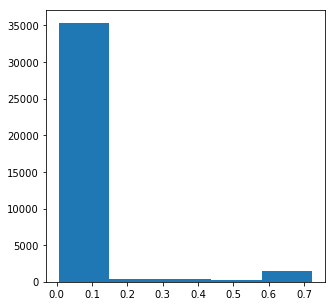

In [38]:
plt.hist(y_train['NPWD2881'], num_classes)

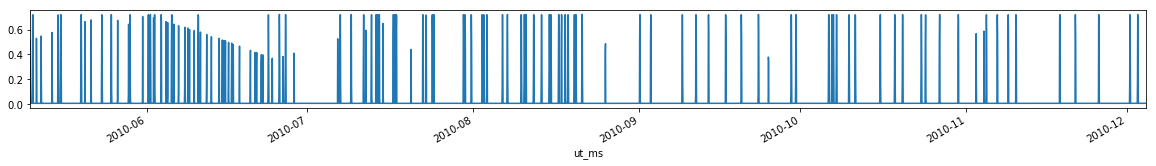

In [39]:
plt.figure(figsize=(20, 2))
y_train['NPWD2881'][15000:20000].plot()

In [40]:
y_pred_cls = cls_model.predict(X_norm_valid)
y_pred_reg = nn_model.predict(X_norm_valid)
y_pred_mean = mean_model.predict(X_norm_valid)

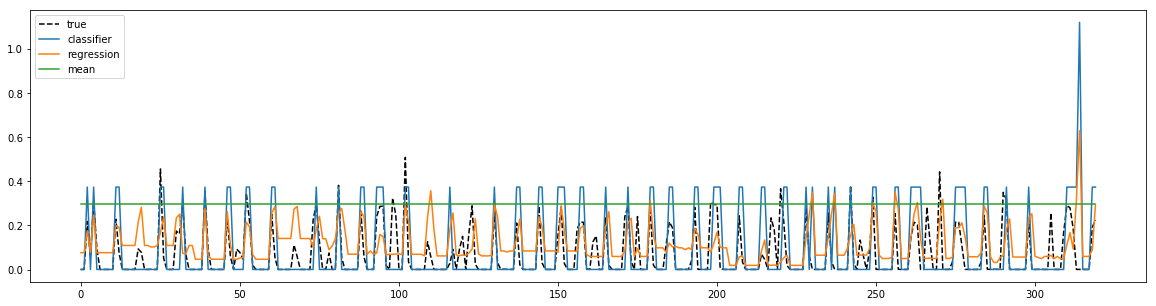

In [41]:
idx = np.where(y_valid.columns == 'NPWD2551')[0][0]

a, b = 480, 800

plt.figure(figsize=(20, 5))
plt.plot(y_valid.values[a:b, idx],'k--', label='true')
plt.plot(y_pred_cls[a:b, idx], label='classifier')
plt.plot(y_pred_reg[a:b, idx], label='regression')
plt.plot(y_pred_mean[a:b, idx], label='mean')
plt.legend()

Probably features are too simple for that line

## Time window simple model

In [42]:
def gen_windowed_dataset(X_data, y_data, window=5):
    it = 0
    data = []
    y = []
    while True:         
        if it + window >= X_data.shape[0]:
            break

        a = it
        b = it + window
        data.append(X_data[a:b])
        y.append(y_data[b])
        it += 1
        
    return np.array(data), np.array(y)
        
window_size = 10
X_win_train, y_win_train = gen_windowed_dataset(X_norm_train, y_train.values, window=window_size)
X_win_valid, y_win_valid = gen_windowed_dataset(X_norm_valid, y_valid.values, window=window_size)

print(X_win_train.shape, y_win_train.shape)

X_win_train = X_win_train.reshape([X_win_train.shape[0], -1])
X_win_valid = X_win_valid.reshape([X_win_valid.shape[0], -1])

print(X_win_train.shape, y_win_train.shape)

(37918, 10, 26) (37918, 33)
(37918, 260) (37918, 33)


In [43]:
num_win_features = X_win_train.shape[1] # num_features * window_size
nn_win_model = SimpleNeuralNetwork(input_shape=num_win_features, output_shape=num_power_lines, layers=[100, 50])
nn_win_model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 260)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               26100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 33)                1683      
Total params: 32,833
Trainable params: 32,833
Non-trainable params: 0
_________________________________________________________________


In [44]:
nn_win_model.fit(x=X_win_train, y=y_win_train, epochs_scheme=[2, 2, 1], lr_scheme=[0.01, 0.001, 0.0001])

Running 2 epochs with learning rate 0.01
Epoch 1/2
37918/37918 [==============================] - 1s - loss: 0.1044     
Epoch 2/2
37918/37918 [==============================] - 1s - loss: 0.0916     
Running 2 epochs with learning rate 0.001
Epoch 1/2
37918/37918 [==============================] - 2s - loss: 0.0896     
Epoch 2/2
37918/37918 [==============================] - 1s - loss: 0.0894     
Running 1 epochs with learning rate 0.0001
Epoch 1/1
37918/37918 [==============================] - 2s - loss: 0.0891     


In [45]:
nn_win_model.evaluate_rmse(train_dataset=(X_win_train, y_win_train), 
                         valid_dataset=(X_win_valid, y_win_valid), 
                         info="windowed neural network")

all_models['nn_win_model'] = nn_win_model

SimpleNeuralNetwork: windowed neural network
RMSE train =  0.0948864996078
RMSE valid =  0.114150187692


### More powerfull model = MORE LAYERS!!!!

In [46]:
better_nn_win_model = SimpleNeuralNetwork(input_shape=num_win_features, output_shape=num_power_lines, layers=[256, 128, 64])
better_nn_win_model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 260)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               66816     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
__________

In [47]:
better_nn_win_model.fit(x=X_win_train, y=y_win_train, epochs_scheme=[2, 2, 2], lr_scheme=[0.01, 0.001, 0.0001])

Running 2 epochs with learning rate 0.01
Epoch 1/2
37918/37918 [==============================] - 2s - loss: 0.1107     
Epoch 2/2
37918/37918 [==============================] - 2s - loss: 0.1006     
Running 2 epochs with learning rate 0.001
Epoch 1/2
37918/37918 [==============================] - 2s - loss: 0.0973     
Epoch 2/2
37918/37918 [==============================] - 2s - loss: 0.0945     
Running 2 epochs with learning rate 0.0001
Epoch 1/2
37918/37918 [==============================] - 2s - loss: 0.0925     
Epoch 2/2
37918/37918 [==============================] - 2s - loss: 0.0919     


In [48]:
better_nn_win_model.evaluate_rmse(train_dataset=(X_win_train, y_win_train), 
                         valid_dataset=(X_win_valid, y_win_valid), 
                         info="windowed neural network with [256, 128, 64] layers")

all_models['better_nn_win_model'] = better_nn_win_model

SimpleNeuralNetwork: windowed neural network with [256, 128, 64] layers
RMSE train =  0.0991775349479
RMSE valid =  0.116751204261


In [49]:
benchmark_models(all_models, y_columns)

,NPWD2451,NPWD2532,NPWD2551,NPWD2561,NPWD2851,NPWD2881,train_rmse,valid_rmse,info
SimpleNeuralNetwork,0.299154,0.250869,0.452485,0.113171,0.191385,0.116759,0.099178,0.116751,"windowed neural network with [256, 128, 64] la..."
SimpleNeuralNetwork,0.281795,0.230331,0.453507,0.112209,0.187741,0.116725,0.094886,0.114150,windowed neural network
BaseModel,0.401223,0.268071,0.628200,0.121259,0.203353,0.119656,0.123222,0.149133,median model
SimpleNeuralNetwork,0.309247,0.198566,0.449271,0.111626,0.197343,0.116903,0.089297,0.114473,simple neural network
BaseModel,0.359447,0.251891,0.500584,0.113754,0.215772,0.117018,0.112497,0.129157,mean model
SimpleClassifier,0.374306,0.264224,0.515396,0.115591,0.262201,0.119799,0.110226,0.137292,simple neural classifier with 5 classes


## Simple RNN

In [50]:
window_size = 32
X_win_train, y_win_train = gen_windowed_dataset(X_norm_train, y_train.values, window=window_size)
X_win_valid, y_win_valid = gen_windowed_dataset(X_norm_valid, y_valid.values, window=window_size)

X_win_train = np.transpose(X_win_train, [0, 2, 1])
X_win_valid = np.transpose(X_win_valid, [0, 2, 1])

input_shape = X_win_train.shape[1:]

print(input_shape, X_win_train.shape, y_win_train.shape)

(26, 32) (37896, 26, 32) (37896, 33)


In [51]:
class SimpleLSTM(SimpleNeuralNetwork):
    def __init__(self, input_shape, output_shape=33):
        BaseModel.__init__(self)
        
        self.input_shape = input_shape
        self.output_shape = output_shape

        # Model definition
        input_data = Input(shape=input_shape)
        x = input_data
        x = LSTM(256)(x)
        x = Dropout(0.4)(x) 
        x = Dense(128, activation='relu')(x)
        x = Dropout(0.4)(x) 
        x = Dense(output_shape, activation='linear')(x)

        self.model = Model(input_data, x)
        self.loss = root_mean_squared_error

rnn_model = SimpleLSTM(input_shape=input_shape, output_shape=num_power_lines)
rnn_model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 26, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               295936    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 33)                4257      
Total params: 333,089
Trainable params: 333,089
Non-trainable params: 0
_________________________________________________________________


In [52]:
rnn_model.fit(x=X_win_train, y=y_win_train, epochs_scheme=[2, 3, 2], lr_scheme=[0.01, 0.001, 0.0001])

Running 2 epochs with learning rate 0.01
Epoch 1/2
37896/37896 [==============================] - 27s - loss: 0.1074    
Epoch 2/2
37896/37896 [==============================] - 24s - loss: 0.0910    
Running 3 epochs with learning rate 0.001
Epoch 1/3
37896/37896 [==============================] - 25s - loss: 0.0828    
Epoch 2/3
37896/37896 [==============================] - 24s - loss: 0.0805    
Epoch 3/3
37896/37896 [==============================] - 24s - loss: 0.0792    
Running 2 epochs with learning rate 0.0001
Epoch 1/2
37896/37896 [==============================] - 26s - loss: 0.0776    
Epoch 2/2
37896/37896 [==============================] - 26s - loss: 0.0773    


In [56]:
rnn_model.evaluate_rmse(train_dataset=(X_win_train, y_win_train), 
                         valid_dataset=(X_win_valid, y_win_valid), 
                         info="simple LSTM 256")

SimpleLSTM: simple LSTM 256
RMSE train =  0.0808077201387
RMSE valid =  0.149227080468


In [57]:
all_models['lstm'] = rnn_model

In [58]:
pd.set_option('display.max_colwidth', -1)
benchmark_models(all_models, y_columns)

,NPWD2451,NPWD2531,NPWD2532,NPWD2551,NPWD2561,NPWD2851,NPWD2881,info,train_rmse,valid_rmse
SimpleNeuralNetwork,0.299154,NaN,0.250869,0.452485,0.113171,0.191385,0.116759,"windowed neural network with [256, 128, 64] layers",0.099178,0.116751
SimpleNeuralNetwork,0.281795,NaN,0.230331,0.453507,0.112209,0.187741,0.116725,windowed neural network,0.094886,0.114150
BaseModel,0.401223,NaN,0.268071,0.628200,0.121259,0.203353,0.119656,median model,0.123222,0.149133
SimpleNeuralNetwork,0.309247,NaN,0.198566,0.449271,0.111626,0.197343,0.116903,simple neural network,0.089297,0.114473
BaseModel,0.359447,NaN,0.251891,0.500584,0.113754,0.215772,0.117018,mean model,0.112497,0.129157
SimpleLSTM,0.447484,0.13914,0.261971,0.578038,0.129976,0.195762,NaN,simple LSTM 256,0.080808,0.149227
SimpleClassifier,0.374306,NaN,0.264224,0.515396,0.115591,0.262201,0.119799,simple neural classifier with 5 classes,0.110226,0.137292


## XGBOOST !

In [59]:
from tqdm import trange, tqdm
import xgboost as xgb

params = {
    'max_depth': 3,
    'subsample': 0.7,
    'colsample_bylevel': 0.4,
    'colsample_bytree': 0.4,
    'n_estimators': 120
}

class XGBPerTarget(BaseModel):
    def __init__(self):
        BaseModel.__init__(self)
        self.estimators = []
    
    def _fit_per_estimator(self, X_data, y_data, n_of_targets):
        for idx in trange(n_of_targets):
            self.estimators[idx].fit(X_data, y_data[:, idx])
        
    def fit(self, X_data, y_data):
        n_of_targets = y_data.shape[1]
        self.estimators = [xgb.XGBRegressor(**params) for _ in range(n_of_targets)]
        self._fit_per_estimator(X_data, y_data, n_of_targets)
        
    def predict(self, X_data):
        return np.hstack([est.predict(X_data).reshape(-1, 1) for est in tqdm(self.estimators)])
    
    
    
xgb_model = XGBPerTarget()

In [60]:
xgb_model.fit(X_train.values, y_train.values)

100%|██████████| 33/33 [00:13<00:00,  2.63it/s]


In [61]:
xgb_model.evaluate_rmse(train_dataset=(X_train.values, y_train.values), 
                         valid_dataset=(X_valid.values, y_valid.values), 
                         info="XGBOOST!!!")

100%|██████████| 33/33 [00:00<00:00, 95.80it/s]

XGBPerTarget: XGBOOST!!!
RMSE train =  0.0811527576809
RMSE valid =  0.115688056815


In [62]:
all_models['xgb_model'] = xgb_model

In [63]:
pd.set_option('display.max_colwidth', -1)
benchmark_models(all_models, y_columns)

,NPWD2451,NPWD2531,NPWD2532,NPWD2551,NPWD2561,NPWD2851,NPWD2881,info,train_rmse,valid_rmse
SimpleNeuralNetwork,0.299154,NaN,0.250869,0.452485,0.113171,0.191385,0.116759,"windowed neural network with [256, 128, 64] layers",0.099178,0.116751
SimpleNeuralNetwork,0.281795,NaN,0.230331,0.453507,0.112209,0.187741,0.116725,windowed neural network,0.094886,0.114150
BaseModel,0.401223,NaN,0.268071,0.628200,0.121259,0.203353,0.119656,median model,0.123222,0.149133
SimpleNeuralNetwork,0.309247,NaN,0.198566,0.449271,0.111626,0.197343,0.116903,simple neural network,0.089297,0.114473
BaseModel,0.359447,NaN,0.251891,0.500584,0.113754,0.215772,0.117018,mean model,0.112497,0.129157
XGBPerTarget,0.297057,0.182043,0.185035,0.431154,NaN,0.224187,0.116799,XGBOOST!!!,0.081153,0.115688
SimpleLSTM,0.447484,0.139140,0.261971,0.578038,0.129976,0.195762,NaN,simple LSTM 256,0.080808,0.149227
SimpleClassifier,0.374306,NaN,0.264224,0.515396,0.115591,0.262201,0.119799,simple neural classifier with 5 classes,0.110226,0.137292
